<a href="https://colab.research.google.com/github/ahmadasad-cloud/skripsi-data-code/blob/main/Analisis_Sentimen_As'ad_Fix_Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def load_data():
  data = pd.read_excel('/content/sample_data/databersihfix.xlsx')

  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,full_text,sentimen,lower,h_angka,tokenizing,filtering,tweet_clean,stopwords,bersih
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...,banyangin kamu lagi gak enak badan terus boome...,"['banyangin', 'kamu', 'lagi', 'gak', 'enak', '...",banyangin kamu lagi gak enak badan terus boome...,bayangin kamu lagi tidak enak badan terus boom...,bayangin kamu enak badan terus boomer boomer b...,bayangin kamu enak badan terus boomer boomer b...
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,"['makin', 'nyata', 'terlihat', 'ketololan', 'b...",makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,makin nyata lihat tolol bocah fomo timnas main...
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...,jgn duitnya dibuat biayain timnas sebelum tike...,"['jgn', 'duitnya', 'dibuat', 'biayain', 'timna...",jgn duitnya dibuat biayain timnas sebelum tike...,jangan duitnya dibuat biayain timnas sebelum t...,jangan duitnya dibuat biayain timnas tiket din...,jangan duit buat biayain timnas tiket dinaikin
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menkes naturalisasi dokter b...,"['barangkali', 'tujuan', 'menkes', 'naturalisa...",barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menteri kesehatan naturalisa...,barangkali tujuan menteri kesehatan naturalisa...,barangkali tuju menteri sehat naturalisasi dok...
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...,menkes mau naturalisasi dokter mau niru sistem...,"['menkes', 'mau', 'naturalisasi', 'dokter', 'm...",menkes mau naturalisasi dokter mau niru sistem...,menteri kesehatan mau naturalisasi dokter mau ...,menteri kesehatan naturalisasi dokter niru sis...,menteri sehat naturalisasi dokter niru sistem ...


In [ ]:
df = pd.DataFrame(tweet_df[['sentimen','tweet_clean']])

In [ ]:
df['sentimen'] = df['sentimen'].astype('category')

In [ ]:
df['sentimen'].value_counts()

,count
sentimen,
netral,1314
positif,689
negatif,47


Text(0.5, 1.0, 'Dataset Asli dan Labeling')

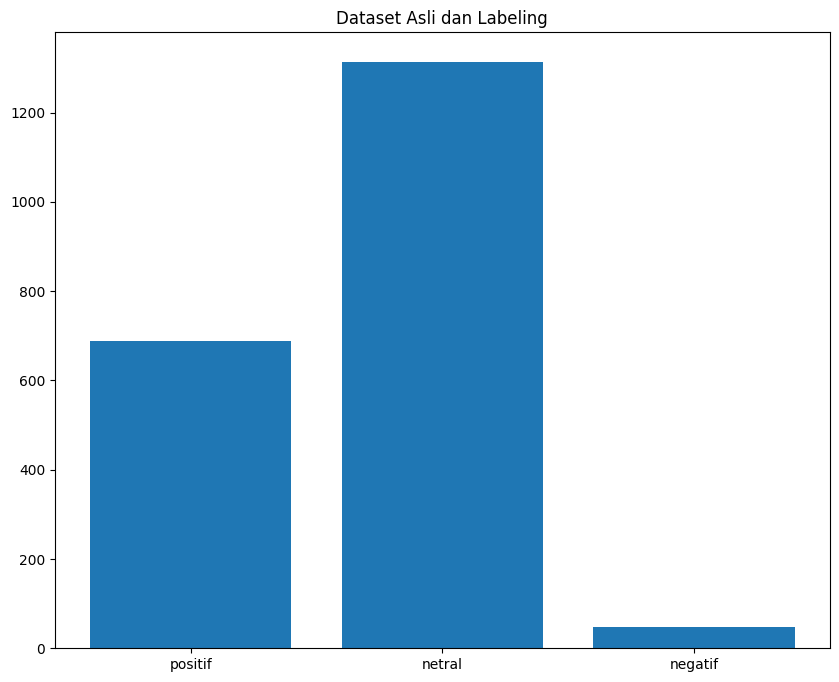

In [ ]:
label_cnt = Counter(df['sentimen'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset Asli dan Labeling")

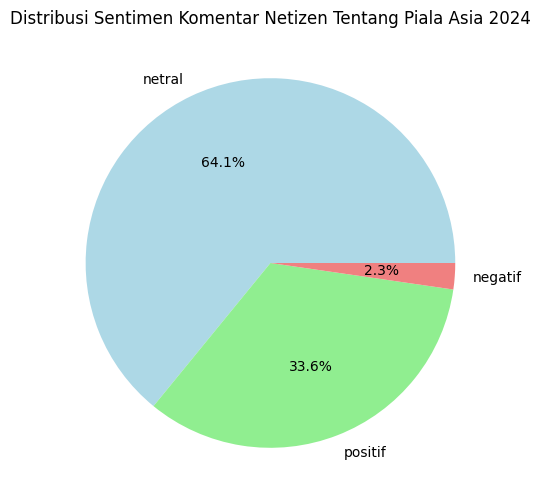

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentimen'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribusi Sentimen Komentar Netizen Tentang Piala Asia 2024')
plt.show()

In [ ]:
X = df.drop(['sentimen'], axis=1)
y = df['sentimen']

In [ ]:
X=df
Y=df['sentimen']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


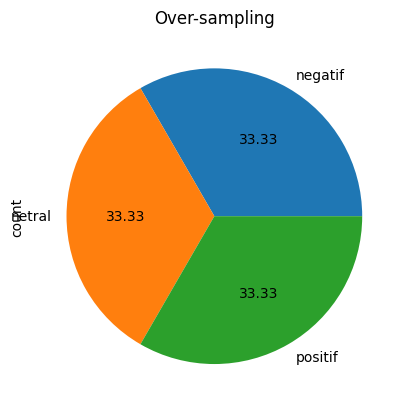

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")


# from imblearn.under_sampling import RandomUnderSampler

# # rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(random_state=0) # String
# X_res, y_res = rus.fit_resample(X,Y)

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [ ]:
# Class distribution
y_res.value_counts()

,count
sentimen,
negatif,1314
netral,1314
positif,1314


In [ ]:
df = X_res

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['tweet_clean'].values.astype('U'))
bow_transformer.vocabulary_

{'bayangin': 507,
 'kamu': 2725,
 'lagi': 3260,
 'tidak': 6193,
 'enak': 1773,
 'badan': 383,
 'terus': 6147,
 'boomer': 859,
 'brengsek': 885,
 'mau': 3608,
 'naturalisasi': 4153,
 'dokter': 1651,
 'elon': 1755,
 'yang': 6613,
 'bukan': 922,
 'pedagang': 4629,
 'molen': 4013,
 'di': 1259,
 'jatihandap': 2553,
 'nanem': 4116,
 'starrlink': 5822,
 'tai': 5947,
 'puskesmas': 5096,
 'bali': 429,
 'dan': 1174,
 'inpluenser': 2435,
 'udah': 6346,
 'dimainkan': 1457,
 'makin': 3504,
 'nyata': 4401,
 'terlihat': 6118,
 'ketololan': 3007,
 'bocah': 834,
 'fomo': 1920,
 'timnas': 6204,
 'karena': 2749,
 'adanya': 30,
 'pemain': 4658,
 'bachdim': 378,
 'itu': 2483,
 'kasusnya': 2767,
 'kaya': 2780,
 'baggot': 389,
 'memilih': 3701,
 'wni': 6577,
 'sejak': 5472,
 'umur': 6373,
 'memiliki': 3702,
 'paspor': 4600,
 'indonesia': 2406,
 'jangan': 2539,
 'duitnya': 1698,
 'dibuat': 1320,
 'biayain': 770,
 'sebelum': 5418,
 'tiket': 6198,
 'dinaikin': 1470,
 'barangkali': 477,
 'tujuan': 6308,
 'menter

In [ ]:
text_bow = bow_transformer.transform(df['tweet_clean'].values.astype('U'))
print(text_bow)

  (0, 383)	1
  (0, 429)	1
  (0, 507)	1
  (0, 859)	2
  (0, 885)	1
  (0, 922)	1
  (0, 1174)	1
  (0, 1259)	2
  (0, 1457)	1
  (0, 1651)	1
  (0, 1755)	1
  (0, 1773)	1
  (0, 2435)	1
  (0, 2553)	1
  (0, 2725)	1
  (0, 3260)	1
  (0, 3608)	1
  (0, 4013)	1
  (0, 4116)	1
  (0, 4153)	1
  (0, 4629)	1
  (0, 5096)	1
  (0, 5822)	1
  (0, 5947)	1
  (0, 6147)	1
  :	:
  (3940, 6278)	1
  (3940, 6279)	1
  (3940, 6632)	1
  (3941, 439)	2
  (3941, 502)	2
  (3941, 715)	1
  (3941, 1031)	2
  (3941, 1174)	1
  (3941, 1262)	1
  (3941, 1900)	2
  (3941, 2076)	2
  (3941, 2406)	1
  (3941, 2429)	1
  (3941, 2791)	2
  (3941, 3378)	2
  (3941, 4153)	2
  (3941, 4658)	2
  (3941, 4845)	2
  (3941, 5592)	2
  (3941, 5637)	1
  (3941, 5936)	1
  (3941, 5944)	1
  (3941, 6204)	1
  (3941, 6387)	2
  (3941, 6632)	1


In [ ]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(3942, 6656)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 383)	0.1601036897613616
  (0, 429)	0.1532139807972004
  (0, 507)	0.16254933700576385
  (0, 859)	0.4437230947960391
  (0, 885)	0.22994748847948834
  (0, 922)	0.10410203215606724
  (0, 1174)	0.07717982739380928
  (0, 1259)	0.12436751602796357
  (0, 1457)	0.21558960423083165
  (0, 1651)	0.11276160972500558
  (0, 1755)	0.20237911244812068
  (0, 1773)	0.1847106754125027
  (0, 2435)	0.2413439823479184
  (0, 2553)	0.2413439823479184
  (0, 2725)	0.1847106754125027
  (0, 3260)	0.10701614378286421
  (0, 3608)	0.08993644429454897
  (0, 4013)	0.2413439823479184
  (0, 4116)	0.2413439823479184
  (0, 4153)	0.03330742559047679
  (0, 4629)	0.2413439823479184
  (0, 5096)	0.16341424254832296
  (0, 5822)	0.2413439823479184
  (0, 5947)	0.19342826582409278
  (0, 6147)	0.1349809609743962
  :	:
  (3940, 6278)	0.2281806902525415
  (3940, 6279)	0.2281806902525415
  (3940, 6632)	0.13730830217426843
  (3941, 439)	0.3141820703338473
  (3941, 502)	0.28688839486756157
  (3941, 715)	0.1709273

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)

predict= pd.Series(prediction)

print(predict.to_string())

0       netral
1      positif
2      positif
3      positif
4       netral
5      negatif
6      positif
7      positif
8      negatif
9       netral
10     positif
11     positif
12      netral
13     positif
14      netral
15      netral
16      netral
17     positif
18      netral
19      netral
20     negatif
21      netral
22      netral
23      netral
24      netral
25     positif
26     positif
27      netral
28     negatif
29     positif
30     negatif
31      netral
32     positif
33      netral
34     negatif
35     positif
36     positif
37     negatif
38     negatif
39     positif
40     negatif
41     negatif
42      netral
43     positif
44     positif
45     positif
46      netral
47     positif
48     negatif
49      netral
50     positif
51     negatif
52     positif
53     negatif
54     negatif
55     negatif
56     negatif
57     positif
58     negatif
59     positif
60      netral
61     negatif
62     positif
63     negatif
64     positif
65      netral
66     pos

In [ ]:
true_label= pd.Series(y_test)
print(true_label.to_string())

1002     netral
257      netral
1841    positif
1259    positif
1906     netral
3134    negatif
3598    positif
1265    positif
3284    negatif
1853     netral
3909    positif
763     positif
1092     netral
1317    positif
138      netral
1652     netral
485      netral
1687    positif
1801     netral
670      netral
2634    negatif
1091     netral
929      netral
1532     netral
722     positif
667     positif
755     positif
81       netral
2075    negatif
3861    positif
2633    negatif
574      netral
3907    positif
1466    positif
2348    negatif
1262    positif
3467    positif
2393    negatif
2707    negatif
403      netral
2375    negatif
3274    negatif
68       netral
3635    positif
3508    positif
452     positif
1515    positif
772     positif
2395    negatif
1473     netral
1965    positif
3178    negatif
1860     netral
3006    negatif
2655    negatif
2980    negatif
2295    negatif
507     positif
3210    negatif
804     positif
1238     netral
3010    negatif
710     

In [ ]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pandas import DataFrame

test time:  0.085s
accuracy:   0.918
              precision    recall  f1-score   support

    Negative       0.99      0.98      0.98       256
      Netral       0.88      0.89      0.88       261
    Positive       0.89      0.89      0.89       272

    accuracy                           0.92       789
   macro avg       0.92      0.92      0.92       789
weighted avg       0.92      0.92      0.92       789



Text(0.5, 23.52222222222222, 'Label prediksi')

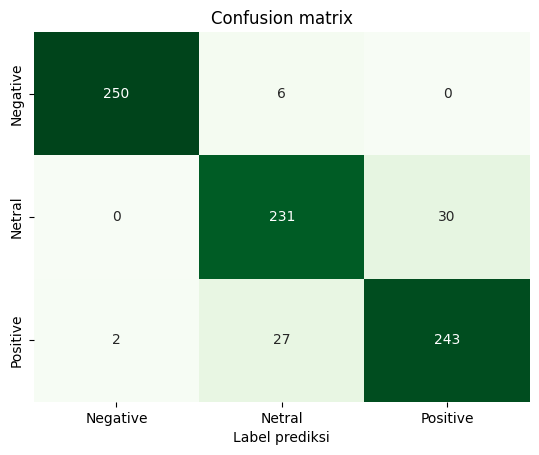

In [ ]:
t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Netral', 'Positive']))

columns = ['Negative','Netral','Positive']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:

print(scores)

# Print the mean accuracy of all 10 folds

print(scores.mean())

[0.9335443  0.9335443  0.90506329 0.91428571 0.93333333 0.88571429
 0.93968254 0.93333333 0.90793651 0.92698413]
0.921342174000402
